 ### installation of all dependancies

In [12]:
!pip install ultralytics -q
!pip install pyyaml -q

### Importing neccesory libraries

In [13]:
from ultralytics import YOLO
import yaml
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import tensorflow as tf

### Predict objcets from the data set and save it into directory , when you run this code go to this path you can see bounded box images /content/runs/detect/predict3

I have used yolov8 model to detect object and bounded box data

In [ ]:
## create list that have all images path
imag_list = glob.glob("/content/Dataset/*.jpg")
model = YOLO("yolov8n.pt")
for i in imag_list:

  # detect image
  model.predict(i,save=True, save_txt= True)

###  Here i have used yolov5 for crop the bounded box data and save this into another folder


In [20]:
import torch

# Model for load the data and crop
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-9-25 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
# detect image , crop image and save it into runs/detect path one by one
for img in imag_list:
  results = model(img)
  results.crop(save=True)

In [ ]:
## here i used the scripts according to the  paths of the images
x = []
for j in glob.glob(f'/content/runs/detect/exp/crops/car/*.jpg'):
  x.append(j)


In [ ]:
for i in range(1,14):
  for j in glob.glob(f'/content/runs/detect/exp{i}/crops/car/*.jpg'):
    x.append(j)




In [ ]:
for i in range(1,14):
  for j in glob.glob(f'/content/runs/detect/exp{i}/crops/cell phone/*.jpg'):
    x.append(j)



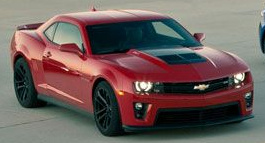

In [27]:
## one of the croped image
image_path =x[8]
image = cv2.imread(image_path)
cv2_imshow(image)



## Preprocessing the data scale the data and resize the data and store ot into 224  * 224

In [28]:
data_set = []
label = []



for i in x:

  dim = cv2.imread(i)
  dim = cv2.resize(dim, (224,224))
  data_set.append(dim/255)
  label.append(0)

data_set = np.array(data_set)
label = np.array(label)

### Split the data into train and test set

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(data_set,label, test_size=0.25,random_state=42)

In [30]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((138, 224, 224, 3), (47, 224, 224, 3), (138,), (47,))

### Here created model of deep learning using tensorflow


# Model Training

In [35]:
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dropout,Dense
from tensorflow.keras.models import Sequential


model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(224,224,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
model.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='softmax')) # softmax for more than 2

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 93312)             0         
                                                                 
 dense_6 (Dense)             (None, 96)               

In [37]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [38]:
history = model.fit(x_train,y_train,epochs=50)

Epoch 1/50
5/5 [==============================] - 4s 96ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 30ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 32ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 37ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 34ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 35ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 37ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 33ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 10/50
5/5 [==============================] - 0s 3

# Model Evluation

In [39]:
scores = model.evaluate(x_test,y_test)

2/2 [==============================] - 1s 256ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


In [40]:
scores

[0.0, 0.0]

#### here I have used some issue that I cant fingure out why model its not showing results it may be poor data or it not leanring from croped images